In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline


In [2]:
fname = r'states_202205241327.csv'

df = pd.read_csv(fname, sep=',')
df.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
0,1,person,person.georgii,unknown,"{""editable"":false,""id"":""georgii"",""source"":""per...",32,2022-05-24 09:19:07.241,2022-05-24 09:19:07.241,2022-05-24 09:19:07.241,NaN
1,2,sun,sun.sun,above_horizon,"{""next_dawn"":""2022-05-25T02:45:38.202291+00:00...",48,2022-05-24 09:19:10.696,2022-05-24 09:19:10.696,2022-05-24 09:19:10.696,NaN
2,3,script,script.lumi_blink,off,"{""last_triggered"":""2022-05-20T15:00:09.414618+...",99,2022-05-24 09:19:27.417,2022-05-24 09:19:27.417,2022-05-24 09:19:27.417,NaN
3,4,zone,zone.home,zoning,"{""latitude"":52.3731339,""longitude"":4.8903147,""...",103,2022-05-24 09:19:27.515,2022-05-24 09:19:27.515,2022-05-24 09:19:27.515,NaN
4,5,automation,automation.novaia_avtomatizatsiia,on,"{""last_triggered"":""2022-05-19T15:30:27.445792+...",130,2022-05-24 09:19:28.716,2022-05-24 09:19:28.716,2022-05-24 09:19:28.716,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      242 non-null    int64  
 1   domain        242 non-null    object 
 2   entity_id     242 non-null    object 
 3   state         237 non-null    object 
 4   attributes    242 non-null    object 
 5   event_id      242 non-null    int64  
 6   last_changed  242 non-null    object 
 7   last_updated  242 non-null    object 
 8   created       242 non-null    object 
 9   old_state_id  197 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 19.0+ KB


In [14]:
# Значения столбца entity_id без повторений

dframe = list(df['entity_id'].drop_duplicates())
dframe

['person.georgii',
 'sun.sun',
 'script.lumi_blink',
 'zone.home',
 'automation.novaia_avtomatizatsiia',
 'automation.novaia_avtomatizatsiia_2',
 'automation.dva_raza_nazhal_na_knopku_na_khabe',
 'switch.blink_0xc46e7baa8a32',
 'switch.tts_0xc46e7baa8a32',
 'switch.tts_interpolate_0xc46e7baa8a32',
 'switch.restart_lumimqtt_0xc46e7baa8a32',
 'switch.reboot_0xc46e7baa8a32',
 'sensor.illuminance_0xc46e7baa8a32',
 'sensor.btn0_0xc46e7baa8a32',
 'sensor.datchik_dvizheniia_battery',
 'light.light_0xc46e7baa8a32',
 'binary_sensor.datchik_dvizheniia_occupancy',
 'persistent_notification.config_entry_discovery',
 'sensor.datchik_vlazhnosti_i_temperatury_battery',
 'sensor.datchik_vlazhnosti_i_temperatury_temperature',
 'sensor.datchik_vlazhnosti_i_temperatury_humidity',
 'sensor.datchik_vlazhnosti_i_temperatury_pressure',
 'persistent_notification.http_login']

In [20]:
# выбор данных о работе датчика движения (включение - state:on, выключение - state:off)
ent_id = 'binary_sensor.datchik_dvizheniia_occupancy'
my_filter = (df['entity_id'] == ent_id) & ((df['state'] == 'on') | (df['state'] == 'off')) 
my_columns = ['state', 'last_changed', 'last_updated', 'created']
df0 = df[my_filter][my_columns]
df0

,state,last_changed,last_updated,created
20,off,2022-05-24 09:26:46.615,2022-05-24 09:26:46.615,2022-05-24 09:26:46.615
102,on,2022-05-24 10:02:25.847,2022-05-24 10:02:25.847,2022-05-24 10:02:25.847
107,off,2022-05-24 10:02:35.886,2022-05-24 10:02:35.886,2022-05-24 10:02:35.886
117,on,2022-05-24 10:03:26.539,2022-05-24 10:03:26.539,2022-05-24 10:03:26.539
122,off,2022-05-24 10:03:36.444,2022-05-24 10:03:36.444,2022-05-24 10:03:36.444
128,on,2022-05-24 10:04:44.381,2022-05-24 10:04:44.381,2022-05-24 10:04:44.381
133,off,2022-05-24 10:04:54.354,2022-05-24 10:04:54.354,2022-05-24 10:04:54.354
137,on,2022-05-24 10:07:28.220,2022-05-24 10:07:28.220,2022-05-24 10:07:28.220
142,off,2022-05-24 10:07:38.309,2022-05-24 10:07:38.309,2022-05-24 10:07:38.309
144,on,2022-05-24 10:09:08.322,2022-05-24 10:09:08.322,2022-05-24 10:09:08.322


In [77]:
X0 = list(df0['last_changed'])
X0

['2022-05-24 09:26:46.615',
 '2022-05-24 10:02:25.847',
 '2022-05-24 10:02:35.886',
 '2022-05-24 10:03:26.539',
 '2022-05-24 10:03:36.444',
 '2022-05-24 10:04:44.381',
 '2022-05-24 10:04:54.354',
 '2022-05-24 10:07:28.220',
 '2022-05-24 10:07:38.309',
 '2022-05-24 10:09:08.322',
 '2022-05-24 10:09:18.383',
 '2022-05-24 10:10:08.824',
 '2022-05-24 10:10:19.054',
 '2022-05-24 10:11:10.106',
 '2022-05-24 10:11:20.110',
 '2022-05-24 10:12:10.495',
 '2022-05-24 10:12:20.491',
 '2022-05-24 10:13:10.856',
 '2022-05-24 10:13:20.814',
 '2022-05-24 10:14:24.655',
 '2022-05-24 10:14:34.743',
 '2022-05-24 10:15:28.789',
 '2022-05-24 10:15:38.791',
 '2022-05-24 10:16:29.355',
 '2022-05-24 10:16:39.358',
 '2022-05-24 10:17:35.697',
 '2022-05-24 10:17:45.644',
 '2022-05-24 10:19:08.242',
 '2022-05-24 10:19:18.236']

In [78]:
Y0 = list(df0['state'])
Y0

['off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off',
 'on',
 'off']

In [102]:
# Формируем данные для построения графика

from datetime import datetime
def ConvDate(d, dd): # date -> millisec
    return (datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000 - dd) // 1e3

d0, d1 = X0[0], X0[-1]
delta = datetime.strptime(d0, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000
                               
X, Y, p = [], [], 0
for i in range(len(Y0)-1):
    y = Y0[i]
    if y == 'off' and p == 0:
        Y.append(0)
        X.append(X0[i])
    elif y == 'off' and p == 1:
        Y.append(1)
        X.append(X0[i])
        Y.append(0)
        X.append(X0[i])
        p = 0
    elif y == 'on' and p == 0:
        Y.append(0)
        X.append(X0[i])
        Y.append(1)
        X.append(X0[i])
        p = 1
    elif y == 'on' and p == 1:
        Y.append(1)
        X.append(X0[i])

X = list(map(lambda item: ConvDate(item, delta), X))                               

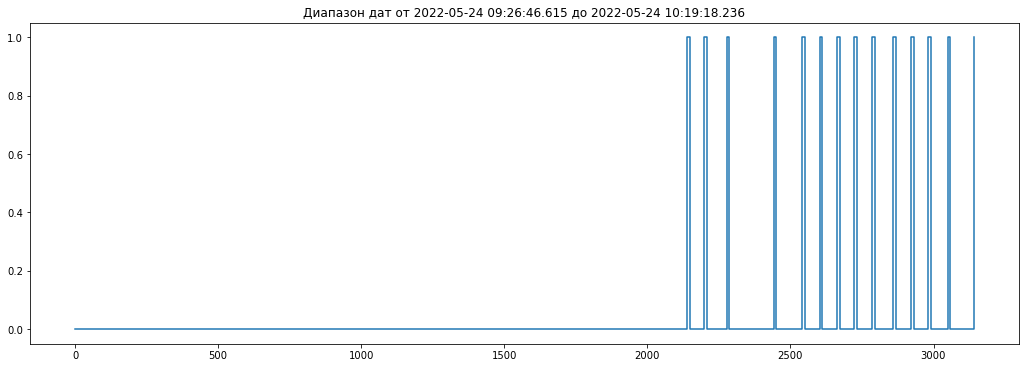

In [108]:
def cm_to_inch(value):
    return value/2.54

plt.figure(figsize=(cm_to_inch(45), cm_to_inch(15)))
plt.plot(X, Y)
plt.title(f"Диапазон дат от {d0} до {d1}")
plt.show()